In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Leitura dos dados de treinamento

In [58]:
data_train = pd.read_csv("./Data/train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Correção de entradas

### Coluna "Age": As entradas 'nan' foram trocadas pela média das idades

In [88]:
'''
A forma encontrada para remover as entradas 'nan'de tipo float foi converter
o array para string e remover as entradas "nan". Com o array limpo, agora em
float, calcula-se a média das idades e substitui nas entradas "nan" no array 
em string. Por final traz o array para float.
'''
ages_array  = data_train["Age"].values.tolist()
a_array_str = [str(val) for val in ages_array] 

ages_clean = [float(val) for val in a_array_str if val != 'nan']
mean_age = sum(ages_clean)/len(ages_clean)

a_array_str[:] = [a_array_str[i] if a_array_str[i] != 'nan' else mean_age for i in range(len(a_array_str))]
ages_array = [round(float(val),1) for val in a_array_str]
data_train["Age"] = ages_array

### Coluna "Fare":

0       7.0
1      71.0
2       8.0
3      53.0
4       8.0
       ... 
886    13.0
887    30.0
888    23.0
889    30.0
890     8.0
Name: Fare, Length: 891, dtype: float64 2


## Estatísticas

### Idade

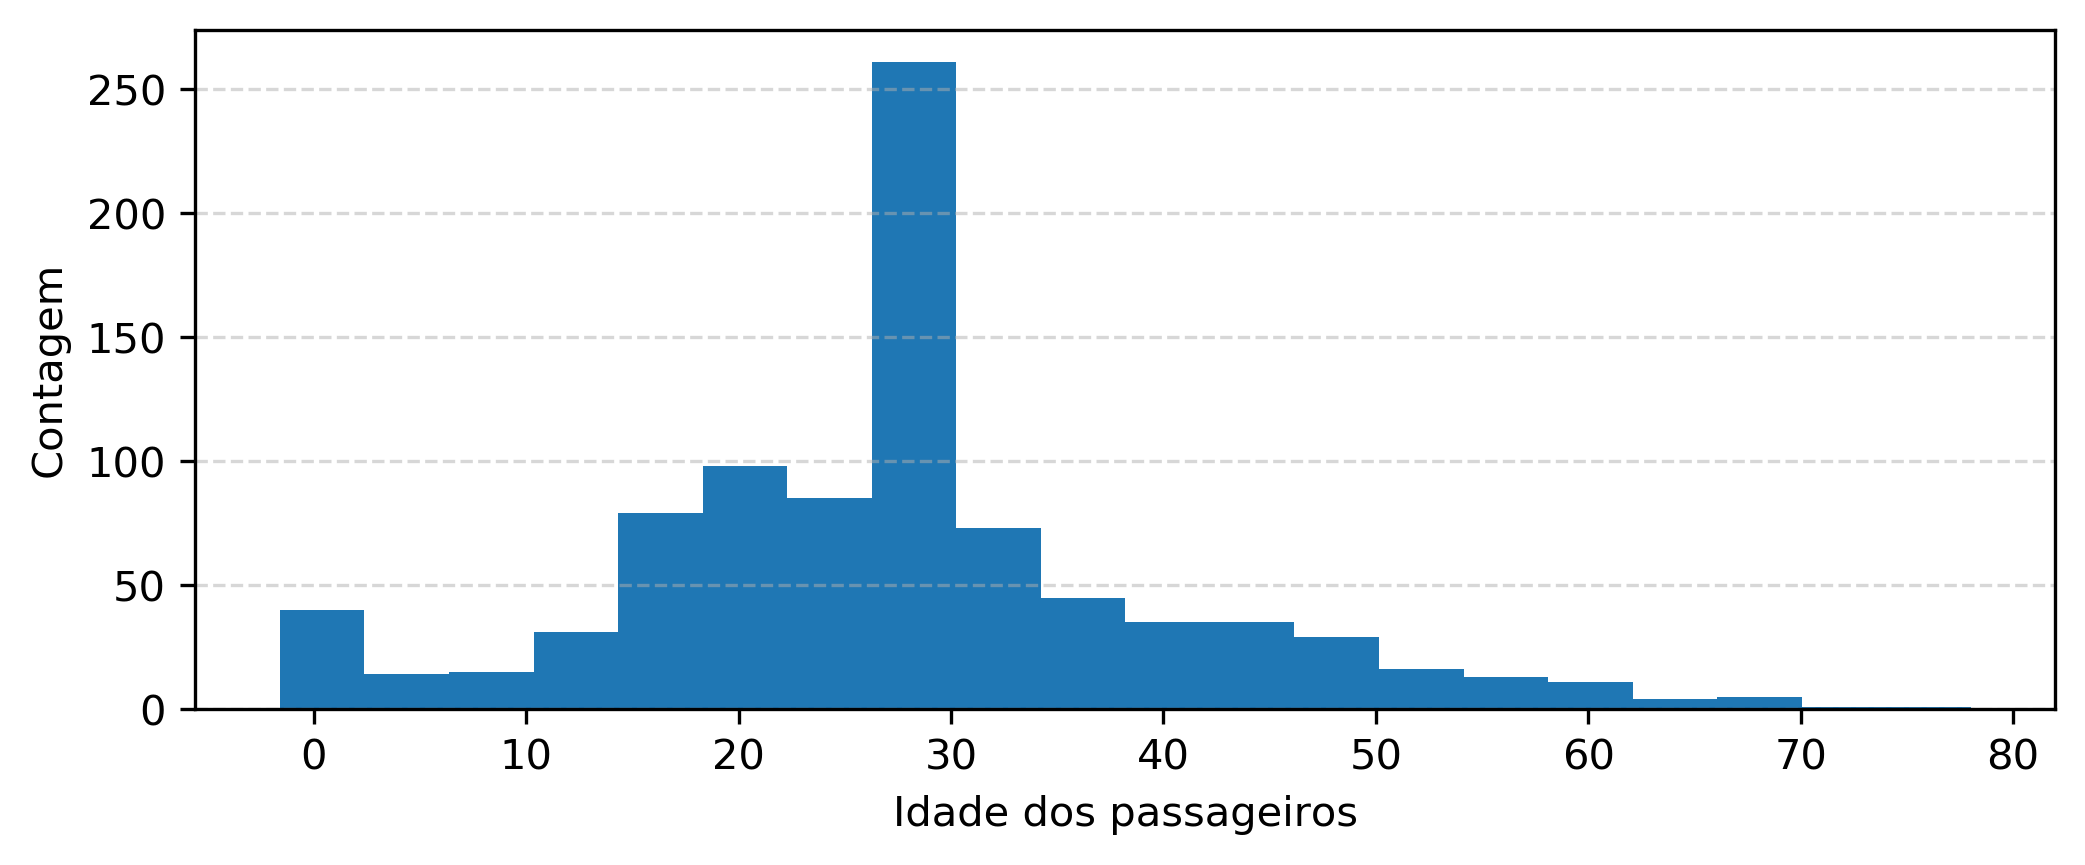

In [85]:
plt.figure(figsize = (8,3), dpi = 300)
plt.hist(data_train["Age"].values.tolist(), bins = 20)
plt.xlabel("Idade dos passageiros", size = 10)
plt.ylabel("Contagem", size = 10)
plt.grid(alpha = 0.5, axis = 'y', linestyle = '--')
plt.show()

### Preço da passagem

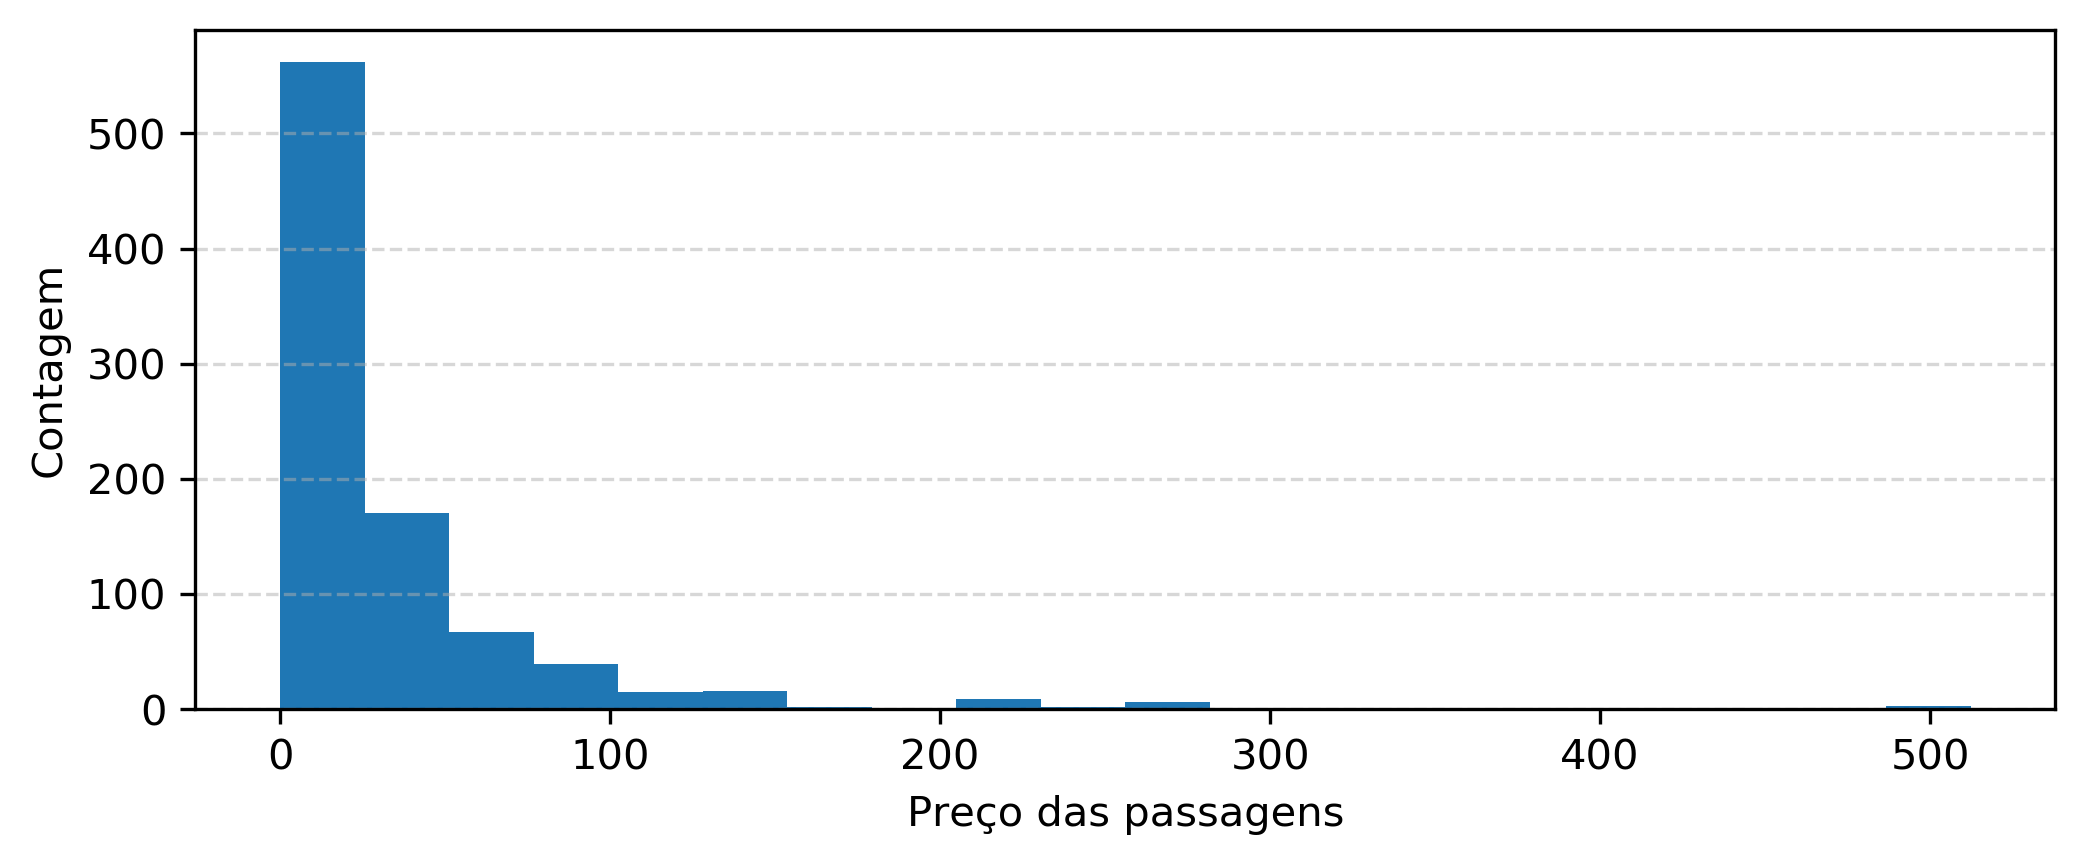

In [87]:
plt.figure(figsize = (8,3), dpi = 300)
plt.hist(data_train["Fare"].values.tolist(), bins = 20)
plt.xlabel("Preço das passagens", size = 10)
plt.ylabel("Contagem", size = 10)
plt.grid(alpha = 0.5, axis = 'y', linestyle = '--')
plt.show()